<a href="https://colab.research.google.com/github/qinwenshuo/CVAE-linguistic-transfer/blob/main/4_CVAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up

In [ ]:
language = 'English'

background_dir = f'/content/drive/MyDrive/cvae_project/4_dep_features/{language}/Native'
target_dir = f'/content/drive/MyDrive/cvae_project/4_dep_features/{language}/Learner'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

Mounted at /content/drive


In [ ]:
l1_list = [
    'Arabic', 'Tswana', 'Greek', 'Japanese', 'Polish', 'Chinese', 'Persian',
    'Swedish', 'Russian', 'Macedonian', 'Korean', 'Czech', 'Aromanian (Vlach)',
    'Dutch', 'Spanish', 'Punjabi', 'Norwegian', 'Bulgarian', 'Italian', 'Hungarian',
    'Chinese-Mandarin', 'Lithuanian', 'Urdu', 'German', 'Chinese-Cantonese', 'Turkish',
    'Serbian', 'French', 'Portuguese', 'Bosnian', 'Finnish', 'Albanian', 'Thai',
    'Indonesian', 'Hindi', 'Telugu', 'Vietnamese', 'Suundi', 'Mongol', 'Farsi',
    'Zulu', 'Romanian', 'Swahili', 'Hebrew', 'Azerbaijani', 'Russian, Ukrainian',
    'Slovak', 'Panjabi', 'Igbo', 'Slovenian', 'Gujarati', 'Tamil', 'Pulaar',
    'Maldivian', 'Mongolian', 'Sinhala', 'Welsh', 'Bengali', 'Catalan'
]


In [ ]:
def read_info(file_paths):
    dep_2d = []
    lang2vec_2d = []
    doc2vec_2d = []
    l1_1d = []

    if not isinstance(file_paths, list):
        file_paths = [file_paths]
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            lines = file.readlines()
        for line in lines[1:]:
            elements = line.strip().split('|')

            dep_features = elements[0].split(', ')
            l1 = elements[1]
            doc2vec = elements[2].split(', ')
            lang2vec = elements[3].split(', ')

            dep_feature_list = []
            for ft in dep_features:
                if ft == '':
                    ft = 0     ### Q: What to do with empty features?
                dep_feature_list.append(np.float64(ft))
            dep_2d.append(dep_feature_list)
            lang2vec_2d.append(lang2vec)
            doc2vec_2d.append(doc2vec)
            l1_1d.append(l1)

    dep_2d = np.array(dep_2d)
    lang2vec_2d = np.array(lang2vec_2d)
    doc2vec_2d = np.array(doc2vec_2d)
    l1_1d = np.array(l1_1d)
    return dep_2d, lang2vec_2d, doc2vec_2d, l1_1d


def list_txt_files(directory_path):
    file_paths = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory_path, filename)
            file_paths.append(file_path)
    return file_paths


background_file_paths = list_txt_files(background_dir)
print(background_file_paths)
target_file_paths = list_txt_files(target_dir)
print(target_file_paths)

all_native_data, native_lang2vec, native_doc2vec, native_l1 = read_info(background_file_paths)
all_learner_data, learner_lang2vec, learner_doc2vec, learner_l1 = read_info(target_file_paths)

['/content/drive/MyDrive/cvae_project/4_dep_features/English/Native/ICNALE_machamp_mbert_1.txt', '/content/drive/MyDrive/cvae_project/4_dep_features/English/Native/ICE-USA_machamp_mbert_1.txt', '/content/drive/MyDrive/cvae_project/4_dep_features/English/Native/OANC_machamp_mbert_1.txt', '/content/drive/MyDrive/cvae_project/4_dep_features/English/Native/BNC_machamp_mbert_1.txt', '/content/drive/MyDrive/cvae_project/4_dep_features/English/Native/ICE-CAN_machamp_mbert_1.txt', '/content/drive/MyDrive/cvae_project/4_dep_features/English/Native/ICE-Ireland_machamp_mbert_1.txt', '/content/drive/MyDrive/cvae_project/4_dep_features/English/Native/LOCNESS_machamp_mbert_1.txt', '/content/drive/MyDrive/cvae_project/4_dep_features/English/Native/Normative_emails_machamp_mbert_1.txt', '/content/drive/MyDrive/cvae_project/4_dep_features/English/Native/PELIC_machamp_mbert_1.txt', '/content/drive/MyDrive/cvae_project/4_dep_features/English/Native/BAWE_machamp_mbert_1.txt']
['/content/drive/MyDrive/cvae

In [ ]:
native_lang2vec

array([['0', '0', '0'],
       ['0', '0', '0'],
       ['0', '0', '0'],
       ...,
       ['0', '0', '0'],
       ['0', '0', '0'],
       ['0', '0', '0']], dtype='<U1')

In [ ]:
learner_lang2vec

array([['0.6', '0.5687', '0.57'],
       ['0.6', '0.5687', '0.57'],
       ['0.6', '0.5687', '0.57'],
       ...,
       ['0.6', '0.3433', '0.7'],
       ['0.6', '0.5032', '0.66'],
       ['0.6', '0.5032', '0.66']], dtype='<U6')

In [ ]:
native_l1

array(['en', 'en', 'en', ..., 'en', 'en', 'en'], dtype='<U2')

In [ ]:
learner_l1

array(['Arabic', 'Arabic', 'Arabic', ..., 'Turkish', 'Japanese',
       'Japanese'], dtype='<U17')

In [ ]:
native_doc2vec.shape, learner_doc2vec.shape

((12192, 300), (51771, 300))

In [ ]:
all_native_data.shape, all_learner_data.shape

((12192, 207), (51771, 207))

In [ ]:
target = all_learner_data.copy()
background = all_native_data.copy()

In [ ]:
N = min(all_native_data.shape[0], target.shape[0]) - min(background.shape[0], target.shape[0])%100
print("Number of smples to use:", N)

Number of smples to use: 12100


In [ ]:
np.random.seed(0)

target_random_indices = np.random.choice(target.shape[0], N, replace=False)
target = target[target_random_indices, :]
learner_lang2vec = learner_lang2vec[target_random_indices, :]
learner_doc2vec = learner_doc2vec[target_random_indices, :]

native_random_indices = np.random.choice(background.shape[0], N, replace=False)
background = background[native_random_indices, :]
native_lang2vec = native_lang2vec[native_random_indices, :]
native_doc2vec = native_doc2vec[native_random_indices, :]

print(target.shape, background.shape)
print(learner_lang2vec.shape, native_lang2vec.shape)
print(learner_doc2vec.shape, native_doc2vec.shape)

(12100, 207) (12100, 207)
(12100, 3) (12100, 3)
(12100, 300) (12100, 300)


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/cvae_project/codes/cvae')
from vae_utils import generate_data, standard_vae, contrastive_vae, plot_latent_space, plot_latent_space4d, contrastive_vae_no_bias, plot_sweeps_mnist, plot_clean_digits, plot_clean_digits_only
from sklearn.metrics import silhouette_score
# NON EXISTING FUNCTIONS
# from vae_utils import plot_sweeps_mnist_vae, plot_clean_digits_vae
# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

# VAE Experiment

In [ ]:
vae, encoder, decoder = standard_vae(input_dim=207, intermediate_dim=32,
                                     latent_dim=4)

Text(0.5, 1.0, 'Min loss:11.807001113891602')

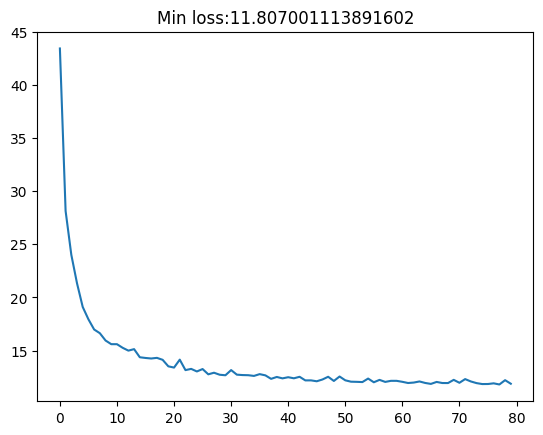

In [ ]:
history = vae.fit(background, epochs=80, batch_size=24, validation_data=(background, None), verbose=0)
plt.plot(history.history['val_loss'])
min_loss = min(history.history['val_loss'])
plt.title('Min loss:' + str(min_loss))

In [ ]:
vae, encoder, decoder = standard_vae(input_dim=207, intermediate_dim=32,
                                     latent_dim=4)

Text(0.5, 1.0, 'Min loss:12.293835639953613')

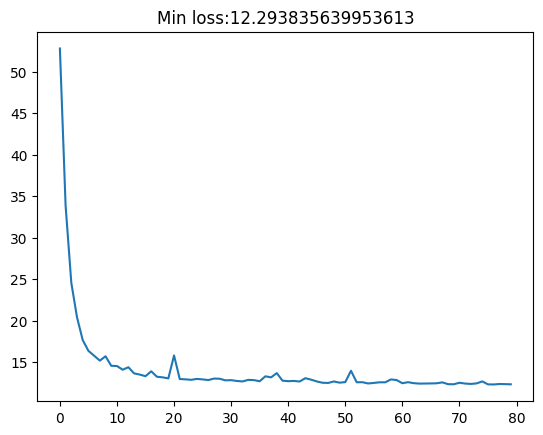

In [ ]:
history = vae.fit(target, epochs=80, batch_size=24, validation_data=(target, None), verbose=0)
plt.plot(history.history['val_loss'])
min_loss = min(history.history['val_loss'])
plt.title('Min loss:' + str(min_loss))

# cVAE Experiment

In [ ]:
## You can adjust these hyperparameters
epoches = 100
batch_size = 100 ## fixed do not change!
intermediate_dim = 64
latent_dim = 4

In [ ]:
# In the author's code(util_cvae.py), the s_encoder encodes background information while
# the z_encoder encodes salient information. This is clearly the opposite of the
# definition they gave in their paper. To minimize confusion, I have switched the
# order of the two encoders here.
# To use what the author originally wanted to use:
# cvae, cvae_fg, z_encoder, s_encoder, cvae_decoder = contrastive_vae(
#    input_dim=266, intermediate_dim=intermediate_dim, latent_dim=latent_dim, disentangle=False, gamma=1)
# and remeber to change the following code

cvae, cvae_fg, s_encoder, z_encoder, cvae_decoder = contrastive_vae(
    input_dim=207, intermediate_dim=intermediate_dim, latent_dim=latent_dim, disentangle=False, gamma=1)


Epoch 1/2
121/121 - 6s - loss: 898.9156 - val_loss: 280.7365 - 6s/epoch - 50ms/step
Epoch 2/2
121/121 - 1s - loss: 189.8467 - val_loss: 133.9831 - 798ms/epoch - 7ms/step
Epoch 1/100
121/121 - 1s - loss: 109.6843 - val_loss: 87.0626 - 868ms/epoch - 7ms/step
Epoch 2/100
121/121 - 1s - loss: 74.2702 - val_loss: 64.5564 - 1s/epoch - 12ms/step
Epoch 3/100
121/121 - 1s - loss: 59.5980 - val_loss: 55.0220 - 1s/epoch - 12ms/step
Epoch 4/100
121/121 - 1s - loss: 53.0242 - val_loss: 50.1150 - 1s/epoch - 11ms/step
Epoch 5/100
121/121 - 1s - loss: 48.7330 - val_loss: 46.7248 - 787ms/epoch - 7ms/step
Epoch 6/100
121/121 - 1s - loss: 45.3575 - val_loss: 46.3186 - 774ms/epoch - 6ms/step
Epoch 7/100
121/121 - 1s - loss: 42.8288 - val_loss: 40.9598 - 805ms/epoch - 7ms/step
Epoch 8/100
121/121 - 1s - loss: 40.1363 - val_loss: 39.3433 - 751ms/epoch - 6ms/step
Epoch 9/100
121/121 - 1s - loss: 38.6029 - val_loss: 37.7831 - 797ms/epoch - 7ms/step
Epoch 10/100
121/121 - 1s - loss: 37.6103 - val_loss: 38.2978

Text(0.5, 1.0, 'Min loss:25.216285705566406')

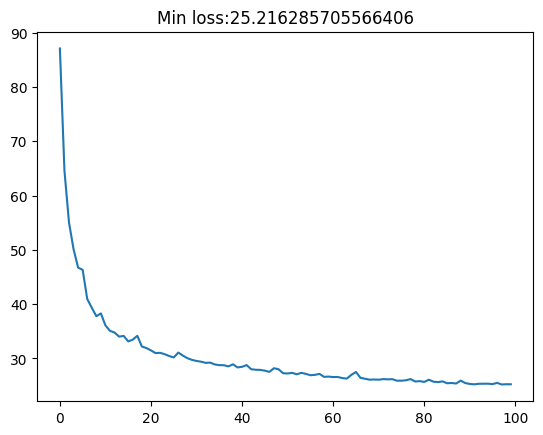

In [ ]:
cvae.fit([target, background], epochs=2, batch_size=batch_size, validation_data=([target, background], None), verbose=2)
history = cvae.fit([target, background], epochs=epoches, batch_size=batch_size, validation_data=([target, background], None), verbose=2)

plt.figure()
plt.plot(history.history['val_loss'])
min_loss = min(history.history['val_loss'])
plt.title('Min loss:' + str(min_loss))

In [ ]:
model_output_dir = f'/content/drive/MyDrive/cvae_project/trained_cvae_model/{language}_E{epoches}_B{batch_size}_ID{intermediate_dim}_LD{latent_dim}.h5'
z_encoder_output_dir = f'/content/drive/MyDrive/cvae_project/trained_cvae_model/{language}_E{epoches}_B{batch_size}_ID{intermediate_dim}_LD{latent_dim}_z_encoder.h5'
s_encoder_output_dir = f'/content/drive/MyDrive/cvae_project/trained_cvae_model/{language}_E{epoches}_B{batch_size}_ID{intermediate_dim}_LD{latent_dim}_s_encoder.h5'
print(model_output_dir)
print(z_encoder_output_dir)
print(s_encoder_output_dir)


/content/drive/MyDrive/cvae_project/trained_cvae_model/English_E100_B100_ID64_LD4.h5
/content/drive/MyDrive/cvae_project/trained_cvae_model/English_E100_B100_ID64_LD4_z_encoder.h5
/content/drive/MyDrive/cvae_project/trained_cvae_model/English_E100_B100_ID64_LD4_s_encoder.h5


In [ ]:
cvae.save(model_output_dir)
s_encoder.save(s_encoder_output_dir)
z_encoder.save(z_encoder_output_dir)

In [ ]:
from tensorflow import keras
## Remember to change the loading directory!
s_encoder = keras.models.load_model(s_encoder_output_dir)
z_encoder = keras.models.load_model(z_encoder_output_dir)


tg_z = z_encoder.predict(target)[2]       # learner background features
tg_s = s_encoder.predict(target)[2]       # learner salient features
bg_z = z_encoder.predict(background)[2]   # native background features

print(tg_z.shape, tg_s.shape, bg_z.shape)

379/379 [==============================] - 1s 2ms/step
(12100, 4) (12100, 4) (12100, 4)


In [ ]:
def zeros_like(x):
    return tf.zeros_like(x)

zeros = tf.keras.layers.Lambda(zeros_like)(tg_z)
cvae_learner_features = tf.concat([tg_s, tg_z], axis=-1)    # features for reconstructing learner corpora
cvae_native_features = tf.concat([zeros, bg_z], axis=-1)    # features for reconstructing native corpora

print(cvae_learner_features.shape)
print(cvae_native_features.shape)

(12100, 8)
(12100, 8)


In [ ]:
prediction_output_dir = f'/content/drive/MyDrive/cvae_project/5_cvae_predictions/{language}_E{epoches}_B{batch_size}_ID{intermediate_dim}_LD{latent_dim}/'
if not os.path.exists(prediction_output_dir):
    os.makedirs(prediction_output_dir)
with open(prediction_output_dir + 'cvae_learner_features.npy', 'wb') as f:
    np.save(f, cvae_learner_features)
with open(prediction_output_dir + 'cvae_native_features.npy', 'wb') as f:
    np.save(f, cvae_native_features)
with open(prediction_output_dir + 'l1_l2_linguistic_distance.npy', 'wb') as f:
    np.save(f, learner_lang2vec)
with open(prediction_output_dir + 'learner_topic_embedding.npy', 'wb') as f:
    np.save(f, learner_doc2vec)
with open(prediction_output_dir + 'native_topic_embedding.npy', 'wb') as f:
    np.save(f, native_doc2vec)
with open(prediction_output_dir + 'tg_s.npy', 'wb') as f:
    np.save(f, tg_s)
with open(prediction_output_dir + 'tg_z.npy', 'wb') as f:
    np.save(f, tg_z)
with open(prediction_output_dir + 'bg_z.npy', 'wb') as f:
    np.save(f, bg_z)


